In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

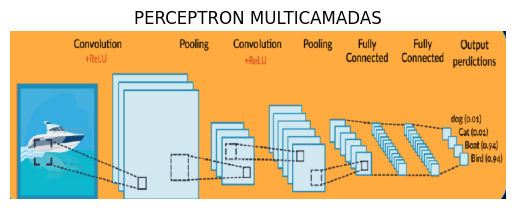

In [6]:
import matplotlib.image as img

imagem = img.imread('download.png')
plt.imshow(imagem)
plt.title('PERCEPTRON MULTICAMADAS')
plt.axis('off') 
plt.show()

# CARREGANDO BANCO DE DADOS

In [48]:
dados = pd.read_csv("stroke.csv")
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# ANALISE SUPERFICIAL DOS DADOS

In [49]:
dados.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [50]:
dados.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [51]:
dados.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [52]:
for coluna in dados.columns:
    if dados[coluna].dtype == 'object':
        print(f"\nColuna '{coluna}':\nTipos possíveis: {dados[coluna].unique()}")


Coluna 'gender':
Tipos possíveis: ['Male' 'Female' 'Other']

Coluna 'ever_married':
Tipos possíveis: ['Yes' 'No']

Coluna 'work_type':
Tipos possíveis: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Coluna 'Residence_type':
Tipos possíveis: ['Urban' 'Rural']

Coluna 'smoking_status':
Tipos possíveis: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# PRÉ-PROCESSAMENTO DOS DADOS

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

# REMOVENDO DADOS NULOS EM BMI

In [53]:
dados[dados.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [54]:
dados = dados.dropna()
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# SEPARANDO OS DADOS INDEPENDENTES E DEPENDENTES

In [55]:
x = dados.iloc[:, 1:-1]
y = dados.iloc[:, -1]
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


# TRANSFORMANDO VARIAVEIS CATEGORICAS BINARIAS EM NUMERICAS

In [56]:
print(x['ever_married'].unique())
print(x['Residence_type'].unique())

['Yes' 'No']
['Urban' 'Rural']


In [57]:
# unique pra descobrir quantos rótulos único
colunas = ['ever_married', 'Residence_type'] 

label = LabelEncoder()
x[colunas] = x[colunas].apply(label.fit_transform)

x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked


# TRANSFORMADOS DADOS CAETAGORICOS COM MAIS DE DUAS OPÇÃO

In [58]:
print(x['gender'].unique())
print(x['work_type'].unique())
print(x['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [59]:
colunas = ['gender', 'work_type', 'smoking_status']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), colunas)], remainder='passthrough')
x = ct.fit_transform(x)
x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

# AJUSTANDO O NOME DAS COLUNAS

In [60]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


# SEPARANDO TREINO E TESTO

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test))

3927 982


# AJUSTANDO DADOS PRA UM INTERVALO

In [62]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 0.82876756, -0.82876756,  0.        , ..., -1.02240525,
         2.10535985, -0.12967152],
       [ 0.82876756, -0.82876756,  0.        , ...,  0.97808574,
         0.48639369, -0.02769749],
       [ 0.82876756, -0.82876756,  0.        , ...,  0.97808574,
         3.35556399,  0.83908174],
       ...,
       [-1.20661093,  1.20661093,  0.        , ..., -1.02240525,
        -0.6927481 , -0.20615204],
       [ 0.82876756, -0.82876756,  0.        , ..., -1.02240525,
        -1.04402475, -0.34636633],
       [-1.20661093,  1.20661093,  0.        , ...,  0.97808574,
         0.05553618, -0.06593775]])

# CRIANDO ARQUETETURA DA REDE NEURAK (MLP)

In [63]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) # rede neural com 6 neurônios e função de ativação ReLU.
modelo.add(tf.keras.layers.Dense(units=6, activation='relu')) # rede neural com 6 neurônios e função de ativação ReLU.
modelo.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # saída à rede neural com 1 neurônio e função de ativação sigmóide.

# TREINANDO MODELO

In [64]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
historico = modelo.fit(x_train, y_train, batch_size=32, epochs=100) # tamanho de lote de 32 e 20 épocas.

Epoch 1/100


123/123 [==============================] - 2s 2ms/step - loss: 0.3879 - accuracy: 0.8852
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9559
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9572
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1701 - accuracy: 0.9572
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9572
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9572
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9572
Epoch 8/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9572
Epoch 9/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.9572
Epoch 10/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9572
E

# VISUALIZANDO TREINAMENTO

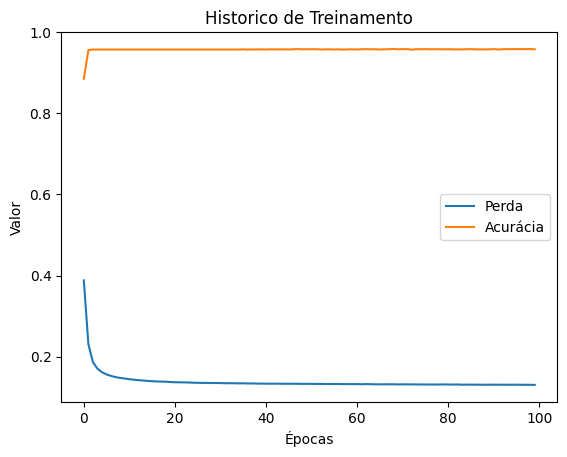

In [65]:
historico.history.keys()
plt.plot(historico.history['loss'], label='Perda')
plt.plot(historico.history['accuracy'], label='Acurácia')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()

# ANALISANDO RESULTADOS

In [66]:
y_pred = modelo.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

print(np.concatenate([pred_array, test_array], axis=1))

31/31 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [67]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[940   1]
 [ 41   0]]
0.9572301425661914


In [68]:
dados['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64